In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from utils import camb_clfile
import numpy as np
import healpy as hp

In [2]:
cl_unl = camb_clfile("/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [3]:
%load_ext autoreload
%autoreload 2
import quest 

In [4]:
clpp = quest.RecoBase.from_ini('../litebirdFG1.ini')

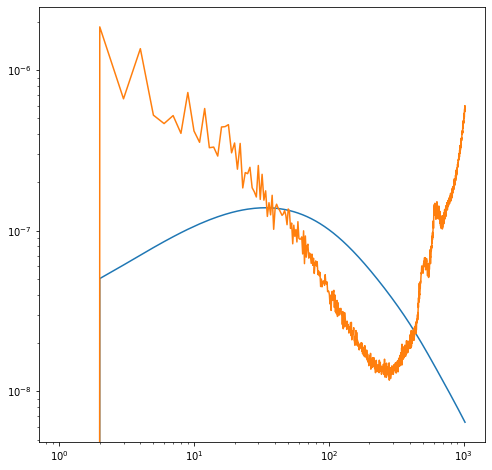

In [5]:
clpp.plot_mf()

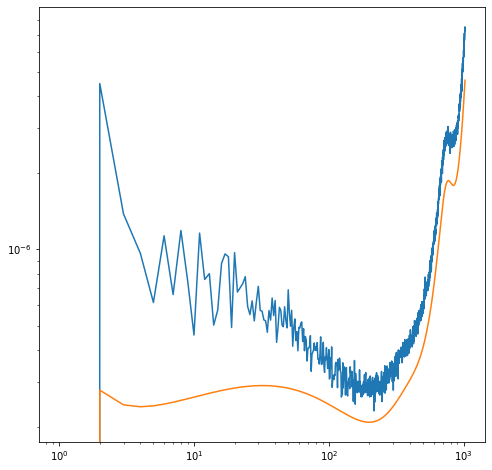

In [6]:
clpp.plot_recon_sim(40)

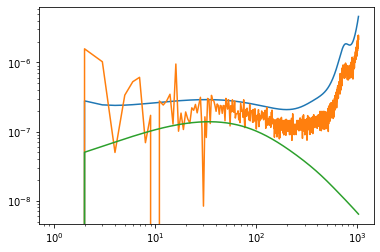

In [7]:
clpp.plot_qcl_sim(40)

Calculating reconstruction stat: 100%|██████████| 400/400 [01:02<00:00,  6.35realisation/s]


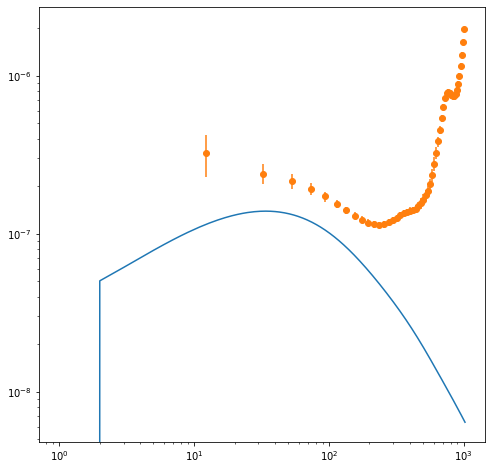

In [51]:
clpp.plot_qcl_stat(400)

In [44]:
#clpp.SNR_phi(400)

In [45]:
#clpp.plot_tXphi_stat(500)

In [46]:
#clpp.SNR_tp(500)